# Statistical Analysis for Chicago crime dataset



# Data ingestion

In [3]:
# %pip install gdown dask pyarrow
# import dask.dataframe as dd

In [4]:
# # import lib for loading the dataset 
import gdown
import zipfile

# # Importing the dataset from google drive
# raw_link = "https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing"
# id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"
# file_path = "crime.zip"

# # Loading the dataset
# gdown.download(f"https://drive.google.com/uc?id={id}",file_path, quiet=False)

# uncomment this code to download the data.


In [5]:
# Data wrangling libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# lib for datetime
from datetime import datetime, timedelta

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [6]:
# Extracting and listing the files in the zipped dataset
# with zipfile.ZipFile(file_path, "r") as z:
#     # List files
#     print(z.namelist()) 
#     z.extractall("crime_dataset")


# Commenting this out because I have read/loaded the dataset to my workspace.
    

In [7]:
import pandas as pd
# Define data types to reduce memory usage
dtype_dict = {
    'ID' : 'Int32',
    'Case Number': 'string',
    'Block': 'string',
    'IUCR': 'category',
    'Primary Type': 'category',
    'Description': 'category',
    'Location Description': 'category',
    'Arrest': 'boolean',
    'Domestic': 'boolean',
    'Beat': 'Int64',
    'District': 'Int64',
    'Ward': 'Int64',
    'Community Area': 'Int64',
    'FBI Code': 'category',
    'X Coordinate': 'float32',
    'Y Coordinate': 'float32',
    'Year': 'float64',
    'Latitude': 'float32',
    'Longitude': 'float32',
    'Location': 'string'
}

# Loading the dataset with dask to handle the huge csv files
crime_data = pd.read_csv('crime_dataset/Crimes_-_2001_to_Present.csv',dtype=dtype_dict, parse_dates=['Date', 'Updated On'],date_format="%m/%d/%y %I:%M:%S %p",low_memory=False,keep_default_na=True)



# Print the first five rows
crime_data.head()




,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,02/10/2018 03:50:01 PM,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,02/10/2018 03:50:01 PM,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,<NA>
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,02/10/2018 03:50:01 PM,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,02/10/2018 03:50:01 PM,41.881905,-87.755119,"(41.881903443, -87.755121152)"


In [8]:
# Creating a copy of the dataset
crime_dataset = crime_data.copy()
crime_dataset.tail()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2232815,2908368,HJ585707,08/25/2003 10:45:00 AM,022XX N CLYBOURN AVE,0810,THEFT,OVER $500,SIDEWALK,False,False,1811,18,32,7,06,1166208.0,1914821.0,2003.0,02/28/2018 03:56:25 PM,41.921848,-87.664726,"(41.921849049, -87.664728374)"
2232816,2908369,HJ583046,08/24/2003 12:10:00 AM,008XX N LARRABEE ST,0460,BATTERY,SIMPLE,STREET,False,False,1822,18,27,8,08B,1172214.0,1905716.0,2003.0,02/28/2018 03:56:25 PM,41.896732,-87.642929,"(41.896733835, -87.642930114)"
2232817,2908370,HJ585049,08/25/2003 04:05:43 AM,026XX N LINCOLN AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,1933,19,32,7,08B,1168979.0,1917638.0,2003.0,02/10/2018 03:50:01 PM,41.929520,-87.654465,"(41.929519303, -87.654465069)"
2232818,2908371,HJ581751,08/22/2003 10:00:00 AM,077XX S PEORIA ST,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,RESIDENCE,False,False,621,6,17,71,05,1171645.0,1853600.0,2003.0,02/28/2018 03:56:25 PM,41.753735,-87.646553,"(41.75373517, -87.646550049)"
2232819,2908372,HJ560948,08/14/2003 03:07,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


# Preliminary data analysis

In [9]:
# Converting the date to datetime
crime_dataset['Date'] = pd.to_datetime(crime_dataset['Date'])
crime_dataset['Date'].dtypes

dtype('<M8[ns]')

In [10]:
# Checking the data type
crime_data_type = crime_dataset.dtypes
print("Data type\n:", crime_data_type)

Data type
: ID                               Int32
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                         boolean
Domestic                       boolean
Beat                             Int64
District                         Int64
Ward                             Int64
Community Area                   Int64
FBI Code                      category
X Coordinate                   float32
Y Coordinate                   float32
Year                           float64
Updated On                      object
Latitude                       float32
Longitude                      float32
Location                string[python]
dtype: object


In [11]:
# Printing the columns 
crime_data_cols = pd.read_csv('crime_dataset/Crimes_-_2001_to_Present.csv', nrows=5)
print(crime_data_cols.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')


In [12]:
# Renaming the columns (removing whitespaces, convert to lower case and replace " " with ",") 
crime_dataset = crime_data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))
first_five_rows = crime_dataset.head()
print("First five rows in the dataset:", first_five_rows)

First five rows in the dataset:          id case_number                    date                  block  iucr primary_type              description location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate    year              updated_on   latitude  longitude                       location
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False      True   924         9    12              61      08B     1165074.0     1875917.0  2015.0  02/10/2018 03:50:01 PM  41.815117 -87.669998  (41.815117282, -87.669999562)
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING              CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015.0  02/10/2018 03:50:01 PM  41.895081 -87.765404  (41.895080471, -87.765400451)
2  11646166    JC213529  0

In [13]:
# Checking the dataset for missing values
crime_dataset.isna().sum()

id                           0
case_number                  0
date                         0
block                        1
iucr                         1
primary_type                 1
description                  1
location_description      3894
arrest                       1
domestic                     1
beat                         1
district                     2
ward                    586706
community_area          584370
fbi_code                     1
x_coordinate             12068
y_coordinate             12068
year                         1
updated_on                   1
latitude                 12068
longitude                12068
location                 12068
dtype: int64

In [14]:
# Checking the dataset for duplicated values
duplicated = crime_dataset.duplicated().sum()
print("Duplicated values:", duplicated)

Duplicated values: 0


# Exploratory Data Analysis

In [15]:
# Convert the year column to Integer
crime_dataset['year'] = crime_dataset['year'].astype('Int64')

# Checking the number of years in the dataset
crime_dataset_years_no = crime_dataset['year'].nunique()
print(f"Chicago crime dataset for {crime_dataset_years_no} years\n")

# Checking the years in the dataset
crime_dataset_years = crime_dataset['year'].unique()
print(f"The years in the dataset are\n{crime_dataset_years}")

Chicago crime dataset for 23 years

The years in the dataset are
<IntegerArray>
[2015, 2018, 2016, 2014, 2001, 2020, 2019, 2021, 2012, 2017, 2013, 2011, 2007, 2003, 2010, 2008, 2009, 2002, 2005, 2006, 2004, 2023, 2022, <NA>]
Length: 24, dtype: Int64


In [16]:
# Checking the size of the dataset
crime_dataset.shape

(2232820, 22)

In [17]:
# Checking the data type
crime_dataset.info

<bound method DataFrame.info of                id case_number                    date                  block  iucr primary_type              description location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate  year              updated_on   latitude  longitude                       location
0        10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False      True   924         9    12              61      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.669998  (41.815117282, -87.669999562)
1        10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING              CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895081 -87.765404  (41.895080471, -87.765400451)
2        11646

# Descriptive Data Analysis

In [18]:
# Checking the Statistical summary of the data
# fetching numeric columns only

crime_data_numeric = crime_dataset.select_dtypes(include=['number']).columns
crime_data_numeric_summary = crime_dataset[crime_data_numeric].describe()
print("\nSummary Statistics:\n", crime_data_numeric_summary)



Summary Statistics:
                    id         beat   district       ward  community_area  x_coordinate  y_coordinate         year      latitude     longitude
count       2232820.0    2232819.0  2232818.0  1646114.0       1648450.0  2.220752e+06  2.220752e+06    2232819.0  2.220752e+06  2.220752e+06
mean   6356796.215915  1183.254901   11.28524  22.908746       37.000181  1.164676e+06  1.886542e+06  2009.092897  4.184427e+01 -8.767120e+01
std    4469578.354012   703.430818   6.964805   13.99824       21.450413  1.613701e+04  3.125110e+04     7.656509  8.594576e-02  5.872536e-02
min            1051.0        111.0        1.0        1.0             0.0  0.000000e+00  0.000000e+00       2001.0  3.661945e+01 -9.168657e+01
25%        2055034.75        621.0        6.0       10.0            23.0  1.153195e+06  1.859978e+06       2002.0  4.177116e+01 -8.771280e+01
50%         2779111.5       1111.0       10.0       23.0            32.0  1.166229e+06  1.892282e+06       2003.0  4.186020e+0

In [19]:
# Extracting the year, month and day from the dataset
crime_dataset['date'] = pd.to_datetime(crime_dataset['date'])
crime_dataset['year'] = crime_dataset['date'].dt.year
crime_dataset['month'] = crime_dataset['date'].dt.month_name()
crime_dataset['day'] = crime_dataset['date'].dt.day_name()

crime_dataset.head()


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.669998,"(41.815117282, -87.669999562)",September,Saturday
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895081,-87.765404,"(41.895080471, -87.765400451)",September,Friday
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,<NA>,September,Saturday
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937405,-87.716652,"(41.937405765, -87.716649687)",September,Saturday
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881905,-87.755119,"(41.881903443, -87.755121152)",September,Saturday


In [20]:
# Setting the index using date
crime_index =crime_dataset.set_index('primary_type', inplace=True)
crime_index

# Certain Crimes in the last ten Years

In [21]:
# Subsetting the crime for the last ten years
crime_dataset_ten_yrs = crime_dataset[crime_dataset['year'] >= 2013]
crime_dataset_ten_yrs.tail(1000)

,id,case_number,date,block,iucr,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day
primary_type,,,,,,,,,,,,,,,,,,,,,,,
BATTERY,11696479,JC274565,2019-05-22 23:14:00,025XX N LINCOLN AVE,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1932,19,43,7,08B,1169371.0,1917267.0,2019,06/30/2019 03:56:27 PM,41.928493,-87.653038,"(41.928492735, -87.653035407)",May,Wednesday
NARCOTICS,10008910,HY198583,2015-03-25 22:27:00,078XX S BURNHAM AVE,2027,POSS: CRACK,STREET,True,False,421,4,7,43,18,1196080.0,1853618.0,2015,02/10/2018 03:50:01 PM,41.753216,-87.557007,"(41.753214416, -87.557005172)",March,Wednesday
THEFT,11695491,JC273331,2019-05-22 02:00:00,002XX S STATE ST,0870,POCKET-PICKING,CTA TRAIN,False,False,113,1,42,32,06,1176417.0,1899156.0,2019,06/30/2019 03:56:27 PM,41.878639,-87.627693,"(41.878638996, -87.627691486)",May,Wednesday
ASSAULT,10008911,HY198515,2015-03-25 21:30:00,027XX S KEDZIE AVE,0560,SIMPLE,RESTAURANT,False,False,1032,10,22,30,08A,1155469.0,1885729.0,2015,02/10/2018 03:50:01 PM,41.842239,-87.704971,"(41.842240694, -87.704969134)",March,Wednesday
BATTERY,11696069,JC274147,2019-05-22 18:04:00,0000X W 47TH ST,0460,SIMPLE,STREET,True,False,224,2,3,38,08B,1176840.0,1873862.0,2019,06/30/2019 03:56:27 PM,41.809219,-87.626900,"(41.809220836, -87.626902264)",May,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INTERFERENCE WITH PUBLIC OFFICER,11696758,JC274953,2019-05-23 09:58:00,114XX S MICHIGAN AVE,3731,OBSTRUCTING IDENTIFICATION,ALLEY,True,False,531,5,9,49,24,1178868.0,1828967.0,2019,06/30/2019 03:56:27 PM,41.685978,-87.620827,"(41.685977749, -87.620827533)",May,Thursday
ASSAULT,10117964,HY306528,2015-06-17 00:05:00,076XX S COTTAGE GROVE AVE,0560,SIMPLE,BAR OR TAVERN,False,False,624,6,6,69,08A,1182888.0,1854485.0,2015,02/10/2018 03:50:01 PM,41.755909,-87.605324,"(41.755910033, -87.605321288)",June,Wednesday
BATTERY,11697874,JC276200,2019-05-24 04:02:00,080XX S COTTAGE GROVE AVE,0460,SIMPLE,SIDEWALK,False,False,631,6,8,44,08B,1182949.0,1851967.0,2019,06/30/2019 03:56:27 PM,41.749001,-87.605179,"(41.74899896, -87.605175838)",May,Friday


In [ ]:
# Checking the number of crimes rate in the last ten years
# crime_ten_yrs = crime_dataset_ten_yrs['primary_type'].nunique()
# print(f"There were {crime_ten_yrs} crimes recorded in the last ten years\n")

# # Checking the type of crimes rate in the last ten years
# type_crime_ten_yrs = crime_dataset_ten_yrs['primary_type'].unique()
# print(f"The types of crimes in the last ten years:\n {type_crime_ten_yrs}")

KeyError: 'primary_type'

In [24]:
# Checking the crimes in the last ten years
ten_yrs_crimes = crime_dataset_ten_yrs.index.value_counts().head(100)
ten_yrs_crimes

primary_type
THEFT                                249479
BATTERY                              200007
CRIMINAL DAMAGE                      118794
ASSAULT                               77120
DECEPTIVE PRACTICE                    75347
OTHER OFFENSE                         70439
NARCOTICS                             56805
BURGLARY                              51692
MOTOR VEHICLE THEFT                   43498
ROBBERY                               42823
CRIMINAL TRESPASS                     26888
WEAPONS VIOLATION                     19049
OFFENSE INVOLVING CHILDREN             9048
PUBLIC PEACE VIOLATION                 6611
CRIM SEXUAL ASSAULT                    5509
INTERFERENCE WITH PUBLIC OFFICER       4706
SEX OFFENSE                            4202
PROSTITUTION                           3143
ARSON                                  1714
LIQUOR LAW VIOLATION                    949
GAMBLING                                791
KIDNAPPING                              763
STALKING           

`Data Visualization for all the Crimes recorded in the last ten years`

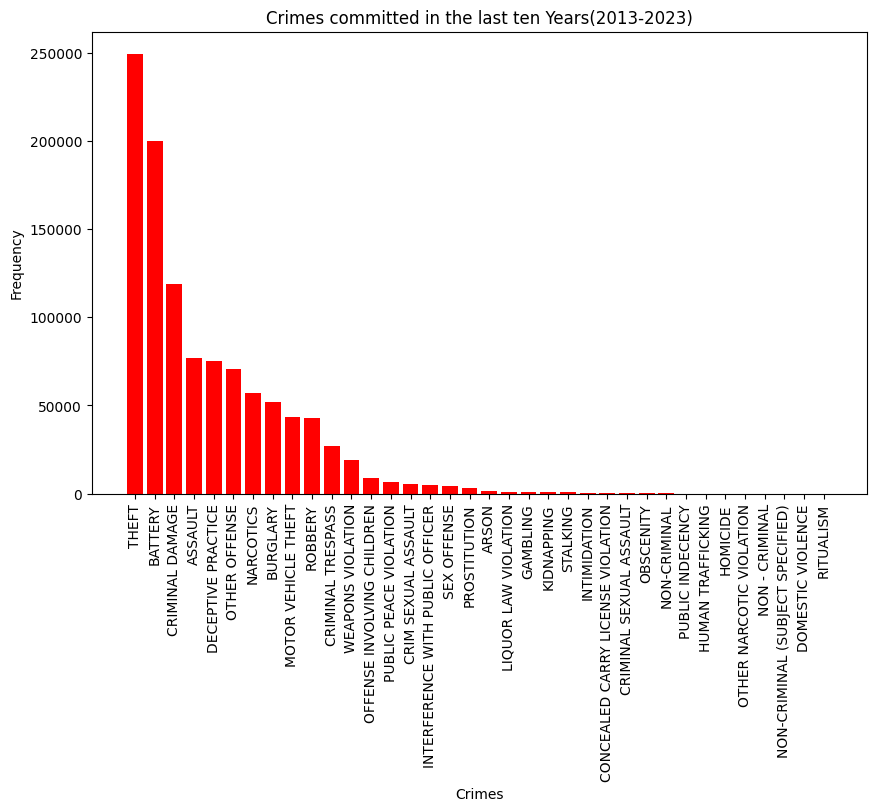

In [25]:
# Plotting a barchart for the crimes committed in the last ten years
plt.figure(figsize=(10,6))
plt.bar(ten_yrs_crimes.index, ten_yrs_crimes.values, color='red')
plt.xlabel('Crimes')
plt.ylabel('Frequency')
plt.title("Crimes committed in the last ten Years(2013-2023)")
plt.xticks(rotation=90)
plt.show()

# Theft in the last ten years

In [41]:
# Selecting the theft in the last ten years
theft = crime_dataset_ten_yrs.loc['THEFT']
print(f"Number of theft recorded from 2013-2023): {theft}")

Number of theft recorded from 2013-2023):                     id case_number                date                  block  iucr     description            location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate  year              updated_on   latitude  longitude                       location      month        day
primary_type                                                                                                                                                                                                                                                                                                                             
THEFT         10224739    HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE  0870  POCKET-PICKING                         CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895081 -87.765404  (41.895080471, -87.7

In [42]:
# Grouping theft by year for the last ten years
theft_ten_yrs = theft.groupby('year').size().sort_values(ascending=True)
print(f"Theft recorded from 2013-2023:\n {theft_ten_yrs}")

Theft recorded from 2013-2023:
 year
2013       21
2022       39
2014      130
2021      501
2023      586
2020     3234
2019    25276
2015    34687
2016    59335
2017    62115
2018    63555
dtype: int64


<Axes: title={'center': 'Theft recorded in the last ten Years(2013-2023)'}, xlabel='Year', ylabel='Frequency'>

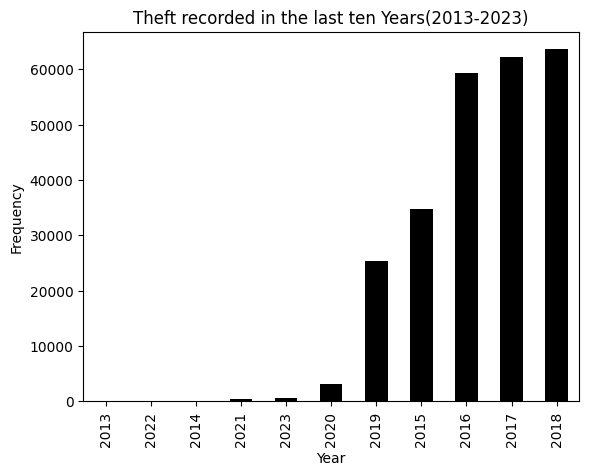

In [ ]:
# Plotting the theft recorded over the last ten years using barchart in Pandas
theft_ten_yrs.plot(kind='bar', xlabel='Year', ylabel='Frequency', title="Theft recorded in the last ten Years(2013-2023)", color='black')

In [56]:
# Grouping the Theft by location over the last ten years
theft_by_location = theft.groupby('block')['year'].size().sort_values(ascending=True)
theft_by_location

block
023XX S KENNETH AVE        1
023XX S KOLIN AVE          1
135XX S AVENUE M           1
135XX S AVENUE N           1
062XX N TRIPP AVE          1
                        ... 
076XX S CICERO AVE       854
0000X S STATE ST         897
0000X N STATE ST        1227
008XX N MICHIGAN AVE    1333
001XX N STATE ST        2649
Name: year, Length: 27592, dtype: int64

In [ ]:
# Plotting the theft recorded over the last ten years using barchart in Pandas
# theft_by_location.plot(kind='bar', xlabel='Year', ylabel='Frequency', title="Theft recorded in the last ten Years(2013-2023)", color='black')
# Plotting a barchart for the crimes committed in the last ten years
plt.figure(figsize=(10,6))
plt.bar(theft_by_location.index, theft_by_location.values, color='red')
plt.xlabel('Location')
plt.ylabel('Year')
plt.title("Theft recorded by location in the last ten Years(2013-2023)")
plt.xticks(rotation=90)
plt.show()